# Block Model with a 1D background -- Comparison

### For the model, see the notebook BlockModel.ipynb

In [1]:
import emg3d
import discretize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
%matplotlib notebook
plt.style.use('ggplot')

## Load data

### `emg3d`

### `PETGEM`

### `custEM`

## Compare 1D background

<IPython.core.display.Javascript object>


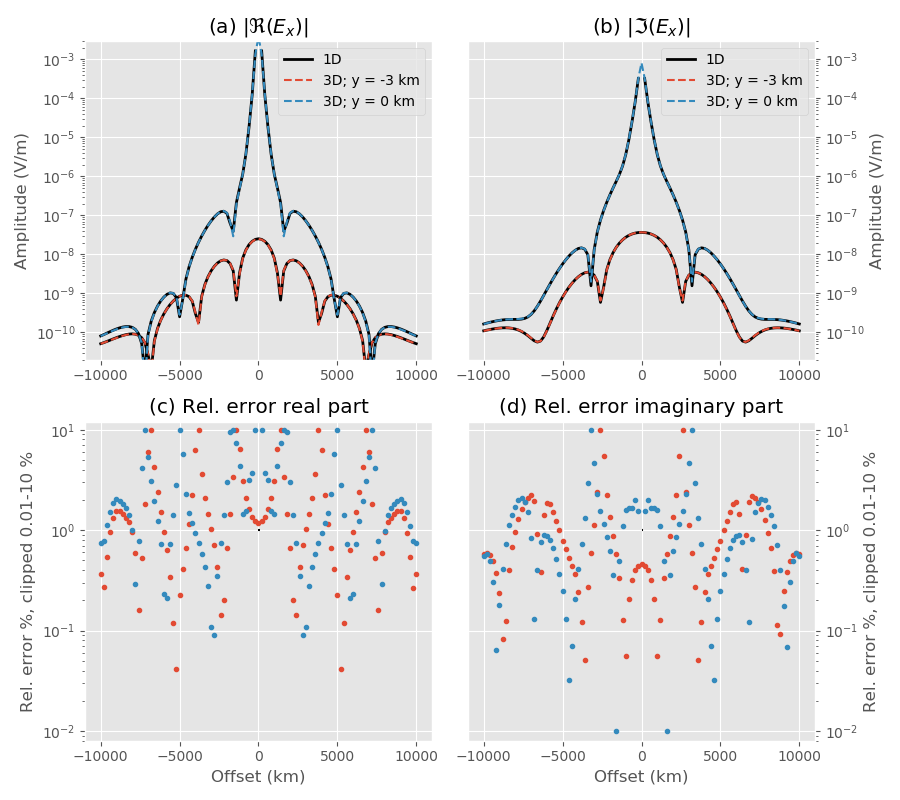

In [14]:
plt.figure(figsize=(9, 8))

# Real
ax1 = plt.subplot(221)
plt.title(r'(a) $|\Re(E_x)|$')
plt.plot(rec_x, abs(epm_1d[:, 0].real), f'k-', lw=2, label=f'1D')
plt.plot(rec_x, abs(egd_bg[:, 0].real), f'C0--', label=f'3D; y = {rec_y[0]/1e3:.0f} km')
plt.plot(rec_x, abs(epm_1d[:, 1].real), f'k-', lw=2)
plt.plot(rec_x, abs(egd_bg[:, 1].real), f'C1--', label=f'3D; y = {rec_y[1]/1e3:.0f} km')
    
plt.yscale('log')
plt.legend()
plt.ylabel('Amplitude (V/m)')

# Imaginary
ax2 = plt.subplot(222, sharey=ax1)
plt.title(r'(b) $|\Im(E_x)|$')

plt.plot(rec_x, abs(epm_1d[:, 0].imag), f'k-', lw=2, label=f'1D')
plt.plot(rec_x, abs(egd_bg[:, 0].imag), f'C0--', label=f'3D; y = {rec_y[0]/1e3:.0f} km')
plt.plot(rec_x, abs(epm_1d[:, 1].imag), f'k-', lw=2)
plt.plot(rec_x, abs(egd_bg[:, 1].imag), f'C1--', label=f'3D; y = {rec_y[1]/1e3:.0f} km')

plt.ylim([2e-11, 3e-3])
plt.legend()
plt.ylabel('Amplitude (V/m)')

ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')

# Real
ax3 = plt.subplot(223)
plt.title('(c) Rel. error real part')

# Calculate error
err = np.clip(100*abs((epm_1d.real-egd_bg.real)/epm_1d.real), 0.01, 10)

plt.plot(rec_x, err[:, 0], 'C0.')
plt.plot(rec_x, err[:, 1], 'C1.')
plt.yscale('log')
plt.hlines(1, 0, 100)
plt.xlabel('Offset (km)')
plt.ylabel('Rel. error %, clipped 0.01-10 %')
plt.ylim([0.008, 12])

# Imaginary
ax4 = plt.subplot(224, sharey=ax3)
plt.title('(d) Rel. error imaginary part')

# Calculate error
err = np.clip(100*abs((epm_1d.imag-egd_bg.imag)/epm_1d.imag), 0.01, 10)

plt.plot(rec_x, err[:, 0], 'C0.')
plt.plot(rec_x, err[:, 1], 'C1.')
plt.yscale('log')
plt.hlines(1, 0, 100)
plt.xlabel('Offset (km)')
plt.ylabel('Rel. error %, clipped 0.01-10 %')
plt.ylim([0.008, 12])

ax4.yaxis.set_ticks_position('right')
ax4.yaxis.set_label_position('right')

plt.tight_layout()
plt.show()

## Compare 3D model

<IPython.core.display.Javascript object>


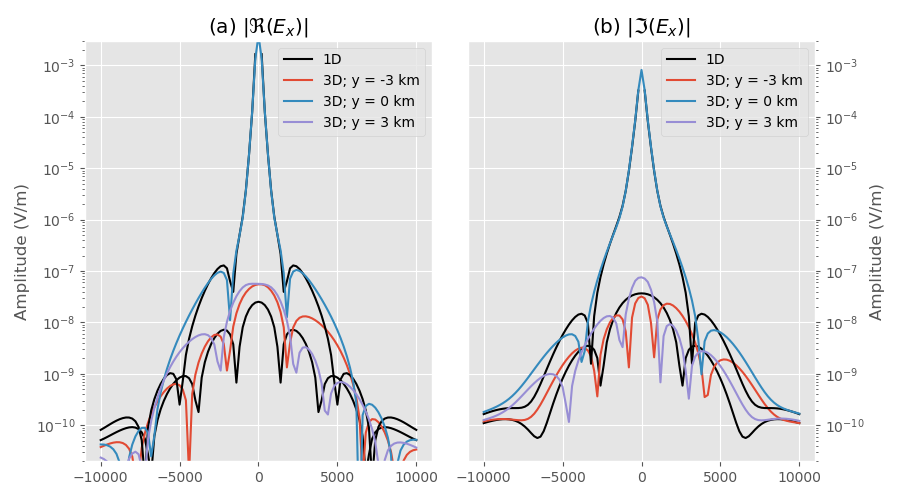

In [17]:
plt.figure(figsize=(9, 5))

# Real
ax1 = plt.subplot(121)
plt.title(r'(a) $|\Re(E_x)|$')

for i, y in enumerate(rec_y):
    if i < 1:
        plt.plot(rec_x, abs(epm_1d[:, i].real), f'k-', label=f'1D')
    elif i < 2:
        plt.plot(rec_x, abs(epm_1d[:, i].real), f'k-')
    plt.plot(rec_x, abs(egd[:, i].real), f'C{i}-', label=f'3D; y = {rec_y[i]/1e3:.0f} km')
    
plt.yscale('log')
plt.legend()
plt.ylabel('Amplitude (V/m)')

# Imaginary
ax2 = plt.subplot(122, sharey=ax1)
plt.title(r'(b) $|\Im(E_x)|$')

for i, y in enumerate(rec_y):
    if i < 1:
        plt.plot(rec_x, abs(epm_1d[:, i].imag), f'k-', label=f'1D')
    elif i < 2:
        plt.plot(rec_x, abs(epm_1d[:, i].imag), f'k-')
    plt.plot(rec_x, abs(egd[:, i].imag), f'C{i}-', label=f'3D; y = {rec_y[i]/1e3:.0f} km')

plt.ylim([2e-11, 3e-3])
plt.legend()
plt.ylabel('Amplitude (V/m)')

ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')

plt.tight_layout()
plt.show()

In [4]:
emg3d.Report([discretize])

--------------------------------------------------------------------------------
  Date: Mon Dec 09 16:15:48 2019 CET

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

            0.4.10 : discretize
            1.17.3 : numpy
             1.3.1 : scipy
            0.46.0 : numba
0.9.2.dev5+g5fa92de.d20191209 : emg3d
             7.9.0 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------